## Second Part: RL Algorithms
### El Hassane Nour

1. The code proposes a random heuristic. Evaluate its performance numerically and compare it with a heuristic that consists in tracking the wind’s orientation as perfectly as possible.

In [1]:
%run -i ./math_utils.py
%run -i ./simu.py
%run -i ./wind_turbine.py

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Random heuristic

In [13]:
# Initialize a wind instance with 10m/s speed, at 270° from the North, 1min time step,
# and with the Ornstein-Uhlenbeck model
wd = Wind(10, 270, 60, 'OU')

# Initialize a wind turbine instance at 350° of heading angle with inertia enabled
wt = Wind_turbine(350, True)

# Initialize an agent instance that will give the policy
ra = Random_agent()

# Set up a simulation that runs for 1 day
sm = Simu(ra, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

# Run the simulation
sm.run_simu()

In [14]:
# Get the logs from the simulation
power_output_1 = sm.power_output_log 				# Power output from the wind turbine in MW
actions = sm.action_log 						# Actions taken by the agent
rel_wind = sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
true_rel_wind = sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
wd_heading = sm.wd_heading_log

Text(0, 0.5, 'Power output (MW)')

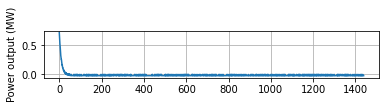

In [15]:
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(power_output_1)
ax1.grid()
ax1.set_ylabel('Power output (MW)')

### Heuristic that tracks the wind’s orientation as perfectly as possible

In [16]:
# Initialize an agent instance that will give the policy
ba = Basic_agent()

# Set up a simulation that runs for 1 day
sm = Simu(ba, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

# Run the simulation
sm.run_simu()

In [18]:
# Get the logs from the simulation
power_output_2 = sm.power_output_log 				# Power output from the wind turbine in MW
actions = sm.action_log 						# Actions taken by the agent
rel_wind = sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
true_rel_wind = sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
wd_heading = sm.wd_heading_log

Text(0, 0.5, 'Power output (MW)')

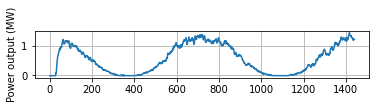

In [23]:
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(power_output_2)
ax1.grid()
ax1.set_ylabel('Power output (MW)')

### Comparison
In order to compare the performance of a heuristic that tracks as much as possible the wind's orientation with the random one, we run two simulations for both random and basic agent under the same circumstances (speed, duration, step-duration, ...etc), and compare their performances by plotting the difference between the power output of the basic agent and the one of the random agent.

Text(0, 0.5, 'Difference of Power output Greedy/Random (MW)')

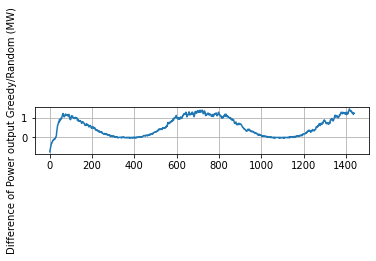

In [24]:
diff=[]
for i in range(len(power_output_1)):
    diff.append(power_output_2[i]-power_output_1[i])
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(diff)
ax1.grid()
ax1.set_ylabel('Difference of Power output Greedy/Random (MW)')

As we can see from the graph, the power output difference of Greedy heuristic and Random heuristic is always positive (starting from 40 iterations), which means that the greedy policy is better than the random policy. This is due to the fact that a greedy policy always chooses the best action, which minimizes the difference of between wind/turbine angles.

2.  Implement an agent that uses a tabular Q-learning algorithm and study its performance and itslearning speed (Hint: choose wisely your state representation, and explain your choices).

In [5]:
%run -i ./Q-learning.py

In [6]:
# Initialize a wind instance with 10m/s speed, at 270° from the North, 1min time step,
# and with the Ornstein-Uhlenbeck model
wd = Wind(10, 270, 60,model_type=None)

# Initialize a wind turbine instance with inertia enabled
wt = Wind_turbine(has_inertia=True)

STATE_SPACE = range(-180,181) # theta in [-180,180] , which is the relative wind heading (wind heading - wind turbine heading)
ACTION_SPACE = [0,1,2]
NB_ACTIONS=len(ACTION_SPACE)

rewards={}
for s in STATE_SPACE:
    for a in ACTION_SPACE:
        wt._heading=wd.heading-s
        rewards[(s,a)]=wt.step(wd.speed, wd.heading,a)

probs = {}

for s in STATE_SPACE :
    probs[(s,0)] = [modulo(s+1,180),rewards[(s,0)]]
    probs[(s,1)] = [s,rewards[(s,1)]]
    probs[(s,2)] = [modulo(s-1,180),rewards[(s,2)]]

alpha=0.01
gamma=0.95
epsilon=0.5
nb_episodes=10

QL_agent=Q_Learning_Agent(epsilon,rewards,probs)
QL_agent.train(alpha,gamma,nb_episodes)

Performance evaluation:

    We run a simulation with the Q-Learning model, and see its performance and learning speed.

In [ ]:
# Initialize a wind turbine instance with inertia enabled
wt = Wind_turbine(initial_estimated_heading=1,has_inertia=True)
# Set up a simulation that runs for 1 day
sm = Simu(QL_agent, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

# Run the simulation
sm.run_simu()

In [13]:
# Get the logs from the simulation
power_output_3 = sm.power_output_log 				# Power output from the wind turbine in MW
actions = sm.action_log 						# Actions taken by the agent
rel_wind = sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
true_rel_wind = sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
wd_heading = sm.wd_heading_log

Text(0, 0.5, 'Power output of Q-Learning model (MW)')

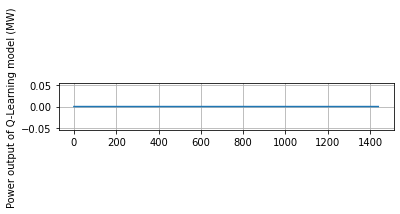

In [14]:
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(power_output_3)
ax1.grid()
ax1.set_ylabel('Power output of Q-Learning model (MW)')

3. (*) Implement a deep-Q-learning algorithm to solve the same task (Hint: again, choose wisely
your state representation and your neural architecture).

In [14]:
%run -i ./DQN.py

In [ ]:
dqn=DQN(probs,STATE_SPACE)
target_model=dqn.train(nb_episodes=2)

Performance evaluation
    
    We run a simulation with the target DQN model, and see its performance and learning speed.

In [ ]:
# Initialize a wind turbine instance with inertia enabled
wt = Wind_turbine(initial_estimated_heading=1,has_inertia=True)
# Set up a simulation that runs for 1 day
sm = Simu(target_model, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

# Run the simulation
sm.run_simu()

In [18]:
# Get the logs from the simulation
power_output_4 = sm.power_output_log 				# Power output from the wind turbine in MW
actions = sm.action_log 						# Actions taken by the agent
rel_wind = sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
true_rel_wind = sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
wd_heading = sm.wd_heading_log

Text(0, 0.5, 'Power output of DQN model (MW)')

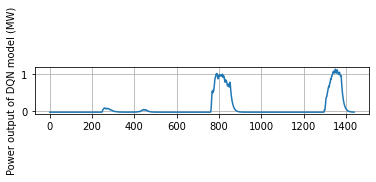

In [19]:
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(power_output_4)
ax1.grid()
ax1.set_ylabel('Power output of DQN model (MW)')

Note that this DQN agent is trained for only 2 episodes, and this is due to my PC hardware capacity. I tried to run for a bigger numbers of episodes, but unfortunately, my PC became too slow. According to the graph, the performance of a DQN model trained with 2 episodes is almost always null (and this is logical because of lack of training), except for some timestemps (800 and 1400) where the power output reached 1 MW.

4. (*) Implement a policy gradient algorithm (Hint: explain your design of a policy, your parametrization and how it learns).

In the following, we'll implement the REINFORCE policy gradient algorithm. It updates the policy parameter based on an estimated return calculated using Monte-Carlo techniques and episode samples.

Explanation of REINFORCE policy design and learning:

1. Initialize a random policy (a Neural Net that takes the state as input and returns the probability of actions).
2. Use the policy to perform T steps + record states, rewards, actions sampled by agent.
3. Calculate the discounted reward for each step by backpropagation.
4. Calculate expected reward G (return).
5. Adjust weights of policy (back-propagate error in Neural Net) to increase G.
6. Repeat from 2.

In [14]:
%run -i ./REINFORCE.py

In [ ]:
model=REINFORCE_agent()
reinforce=REINFORCE(probs,STATE_SPACE,model)
trained_model=reinforce.train(nb_episodes=2)

Performance evaluation:

    We run a simulation with the trained REINFORCE model, and see its performance and learning speed.

In [ ]:
# Initialize a wind turbine instance with inertia enabled
wt = Wind_turbine(initial_estimated_heading=1,has_inertia=True)
# Set up a simulation that runs for 1 day
sm = Simu(trained_model, wd, wt, int(np.ceil(24*3600 / wd.step_duration)))

# Run the simulation
sm.run_simu()

In [21]:
# Get the logs from the simulation
power_output_5 = sm.power_output_log 				# Power output from the wind turbine in MW
actions = sm.action_log 						# Actions taken by the agent
rel_wind = sm.rel_wind_heading_log 				# Estimated direction of the wind in the wind turbine frame
true_rel_wind = sm.true_rel_wind_heading_log 	# True direction of the wind in the wind turbien frame
wd_heading = sm.wd_heading_log

Text(0, 0.5, 'Power output of a REINFORCE PG Algorithm (MW)')

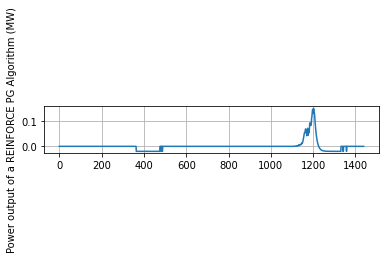

In [22]:
# Plot the result
ax1 = plt.subplot(411)
ax1.plot(power_output_5)
ax1.grid()
ax1.set_ylabel('Power output of a REINFORCE PG Algorithm (MW)')

Same as DQN agent, I trained this REINFORCE agent for only 2 episodes, due to my PC hardware capacity. According to the graph, the performance of a REINFORCE model trained with 2 episodes is almost always null (and this is logical because of lack of training), except for some timestemp 1200 where the power output overcame 0.1 MW.

Obviously, if we trained the two last agents for a bigger number of steps, they would have better policies, and therefore the power output will improve.
Regarding the learning speed, we can see that RL algorithms take a lot of time to converge, but ensure better performances. 